#### Author: Emad Abdalghaffar

#### 2022 _ Information Technology Institute (ITI) _ AI and Machine Learning program

#### Problem: Comparison of different optimizers in a single-variable Linear Regression problem.

<br>Provided are codes with the following optimizers:

- GD optimizer $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (MSE loss function)<br>
<br>
- Quasi Newton (BFGS) optimizer $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (MSE loss function)<br>
<br>
- Ordinary Least Square optimizer by sklearn $\;\;\;\;\;\;\;\;\;\;\;$ (RMSE loss function)<br>
<br>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### GD optimizer of a MSE loss function

> theta0= 0.4651437695102402 
> theta1= 0.827297972036476
> the optimization process stopped after implementing number of iterations/updates = 84
> loss change stop-condition is satisfied
> The accuracy = 0.7702204305203258


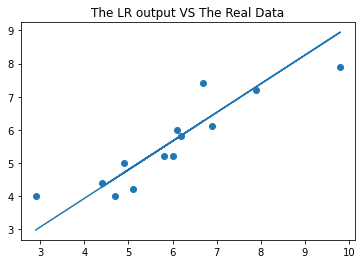

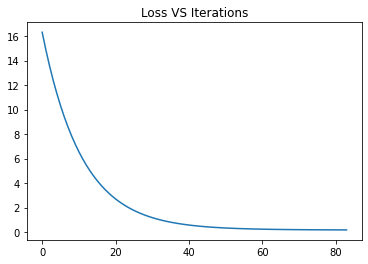

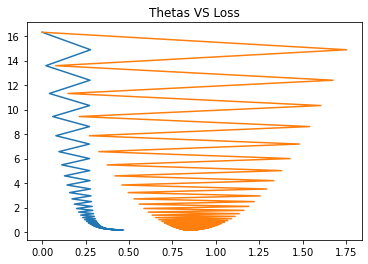

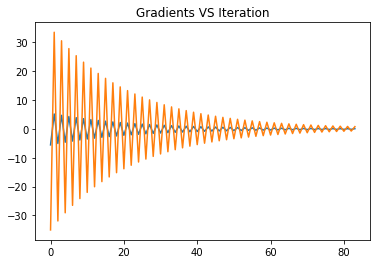

In [2]:
# Batch/Vanilla Gradient Descent optimization of the cost function (MSE), in a single-variable Linear Regression problem.


# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0]
y= data[:,1]
   
def GD(x, y, alpha, iterations):
    
    # initials
    theta0, theta1 = 0, 0
    m= len(x)
    thetas0, thetas1, loss, grth0, grth1= [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b= theta0 + theta1*x
        j= ((hypo_b-y).dot(hypo_b-y))/(2*m)
        gr_theta0= np.sum(hypo_b-y)/m
        gr_theta1= np.sum((hypo_b-y)*x)/m
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss.append(j)
        grth0.append(gr_theta0)
        grth1.append(gr_theta1)

        # variables updates
        theta0-= alpha*gr_theta0
        theta1-= alpha*gr_theta1

        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i >= 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.001:  #in case the limit is set from 0.0001 to 0.001,the optimum is obtained
                                                           #in 84 iters instead of 206, but with accuracy 0.77 instead of 0.8
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.00000001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.000000001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2)

    plt.scatter(x,y)
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    plt.show()
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iteration")
    
GD(x, y, 0.05, 1000)

#### Quasi Newton (BFGS) optimizer of a MSE loss function

> theta0= 1.1005196479203851 
> theta1= 0.727610893955361
> the optimization process stopped after implementing number of iterations/updates = 75
> loss change stop-condition is satisfied
> The accuracy = 0.8066804140213876


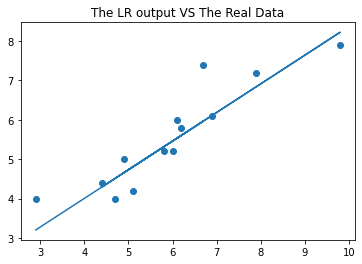

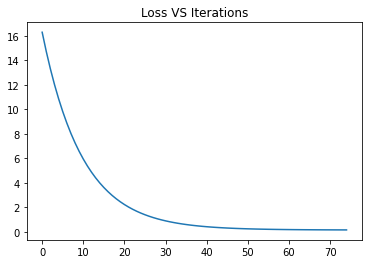

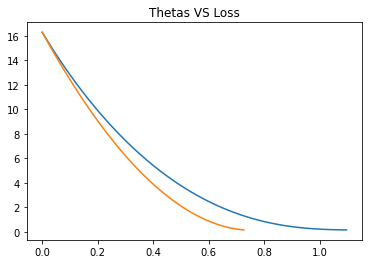

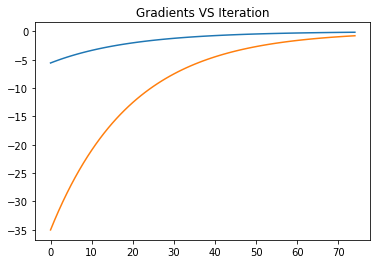

In [3]:
# Quazi Newton (BFGS) optimization of the cost function (MSE), in a single-variable Linear Regression problem.


# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0]
y= data[:,1]
   
def GD(x, y, alpha, iterations):
    
    # initials
    theta0, theta1 = 0, 0
    theta0_prev, theta1_prev= theta0-0.1, theta1-0.1
    m= len(x)
    thetas0, thetas1, loss, grth0, grth1= [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b= theta0 + theta1*x
        hypo_b_prev= theta0_prev + theta1_prev*x
        
        j= ((hypo_b-y).dot(hypo_b-y))/(2*m)
#         j_prev= ((hypo_b_prev-y).dot(hypo_b_prev-y))/(2*m)
        
        gr_theta0= np.sum(hypo_b-y)/m
        gr_theta1= np.sum((hypo_b-y)*x)/m
        gr_theta0_prev= np.sum(hypo_b_prev-y)/m
        gr_theta1_prev= np.sum((hypo_b_prev-y)*x)/m
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss.append(j)
        grth0.append(gr_theta0)
        grth1.append(gr_theta1)

        # variables updates
        theta_curr= np.array([[theta0],
                         [theta1]])
        theta_prev= np.array([[theta0_prev],
                         [theta1_prev]])
        
        delta_theta= theta_curr - theta_prev
        Y= np.array([[gr_theta0], [gr_theta1]]) - np.array([[gr_theta0_prev], [gr_theta1_prev]])
        B_inv_prev= np.identity(2, dtype = float)
        I= np.identity(2, dtype = float)
        B_inv= ((I - (delta_theta.dot(Y.transpose()))/(Y.transpose().dot(delta_theta))).dot(B_inv_prev).dot(
                                    (I - (Y.dot(delta_theta.transpose()))/(Y.transpose().dot(delta_theta))))) + ((delta_theta.dot(delta_theta.transpose()))/(Y.transpose().dot(delta_theta)))
        theta_new= theta_curr - alpha*(B_inv.dot(np.array([[gr_theta0], [gr_theta1]])))
        theta0, theta1= theta_new[0,0], theta_new[1,0]

        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i >= 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.001:  #in case the limit is set from 0.0001 to 0.001,the optimum is obtained
                                                           #in 84 iters instead of 206, but with accuracy 0.77 instead of 0.8
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.00000001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            if np.linalg.norm(theta_curr - theta_prev) < 0.000000001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break
        
        theta_prev, theta_curr= theta_curr, theta_new
        B_inv_prev= B_inv

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2)
    
    plt.scatter(x,y)
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    plt.show()
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iteration")
    
GD(x, y, 0.05, 1000)

#### Ordinary Least Square optimizer of a RMSE loss function (by sklearn)

In [4]:
# Ordinary Least Square optimization of the cost function (RMSE), in a single-variable Linear Regression problem.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0].reshape(-1,1)
y= data[:,1].reshape(-1,1)


sklearn_lr_model= LinearRegression().fit(x,y)
r2= r2_score(y, sklearn_lr_model.predict(x))

print("> The accuracy =", r2)

> The accuracy = 0.8213156778363777


#### As shown, the r2_score is highest by sklearn (0.82), then by BFGS (0.81), and least by GD (0.77).

#### #End